In [351]:
import pandas as pd
df_original=pd.read_csv("./data/data.csv")
print(df_original.head())

  Country Maker/Brand       Type Group_Segment      Segment    2014    2015  \
0   Japan      Toyota  Mini Cars     Passenger  Passenger A   23148   18812   
1   Japan      Toyota       Cars     Passenger  Passenger A       0       0   
2   Japan      Toyota       Cars     Passenger  Passenger A       0       0   
3   Japan      Toyota       Cars     Passenger  Passenger A    2342     801   
4   Japan      Toyota       Cars     Passenger  Passenger B  286270  265426   

     2016    2017    2018    2019   2020   2021   2022   2023 Region    Total  
0   21208   22158   25184   24076  17892  17653  15116  10354   Asia   195601  
1       0       0       0       0      0    520   1106    425   Asia     2051  
2       0       0       0     679   1670   1415   2020   1451   Asia     7235  
3     143       0       0       0      0      0      0      0   Asia     3286  
4  197156  146129  137626  110647  71465  77266  68951  78927   Asia  1439863  


In [247]:
df_original["Region"].unique()

array(['Asia', 'Western Europe', 'Middle East/Africa',
       'Central/Eastern Europe', 'America'], dtype=object)

## Figure 1

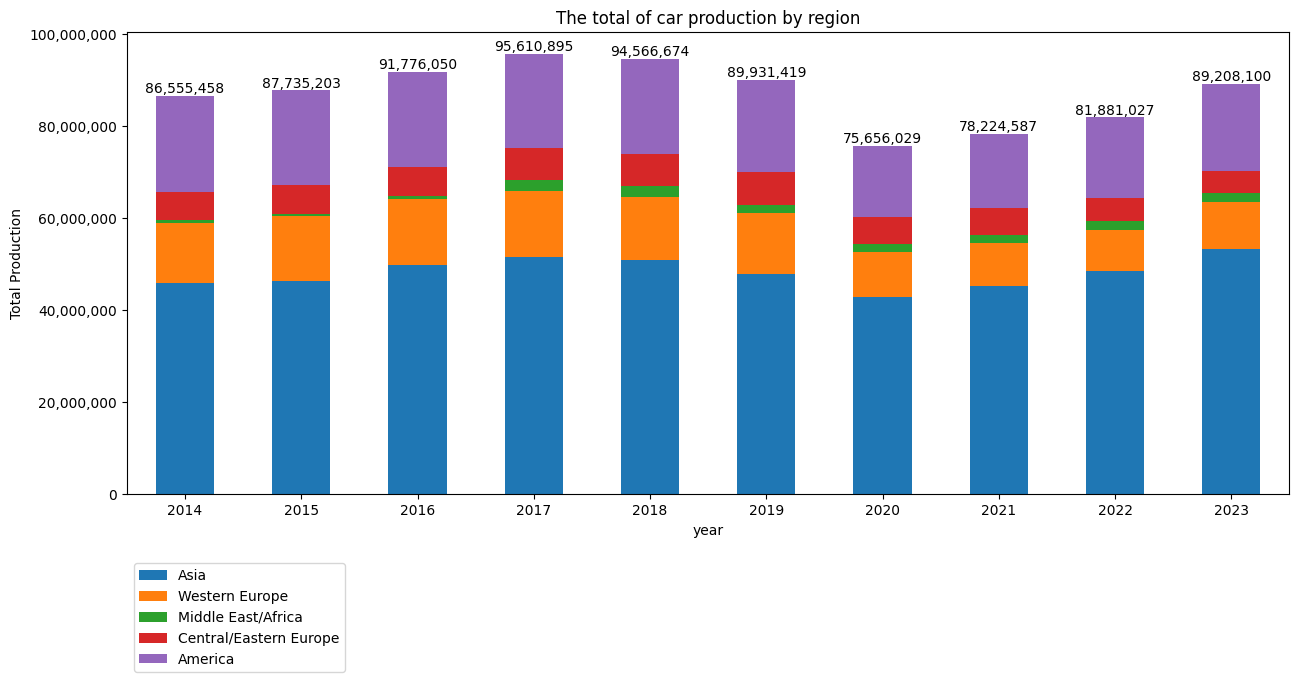

In [397]:
import matplotlib.pyplot as plt
import os
years = [i for i in range(2014,2024)] 
plt.style.use('tableau-colorblind10')
transformed_data = {
    "year": years,
}
regions = df_original["Region"].unique()

for region in regions:
    transformed_data[str(region)]=[]
    for year in years:
        sum_by_year = df_original[ (df_original["Region"] == region)][str(year)].sum()
        transformed_data[str(region)].append(sum_by_year)

colors=["tab:blue","tab:orange","tab:green", "tab:red" ,"tab:purple",] 
# transformed_data
df_transformed = pd.DataFrame(transformed_data)
ax = df_transformed.plot.bar(x='year', stacked=True, title='The total of car production by region',figsize=(15, 6), color=colors)
plt.ylabel("Total Production")
plt.xticks(rotation=0)
for container in ax.containers[4:5]:
    ax.bar_label(container, fmt='{:,.0f}', label_type='edge') 
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))
ax.legend(loc='lower left', bbox_to_anchor=(0, -0.4))
my_path = os.path.abspath("./figure") 
 
my_file = 'figure1_car_production_by_region.png'

plt.savefig(os.path.join(my_path, my_file),bbox_inches='tight')        


# Figure 2

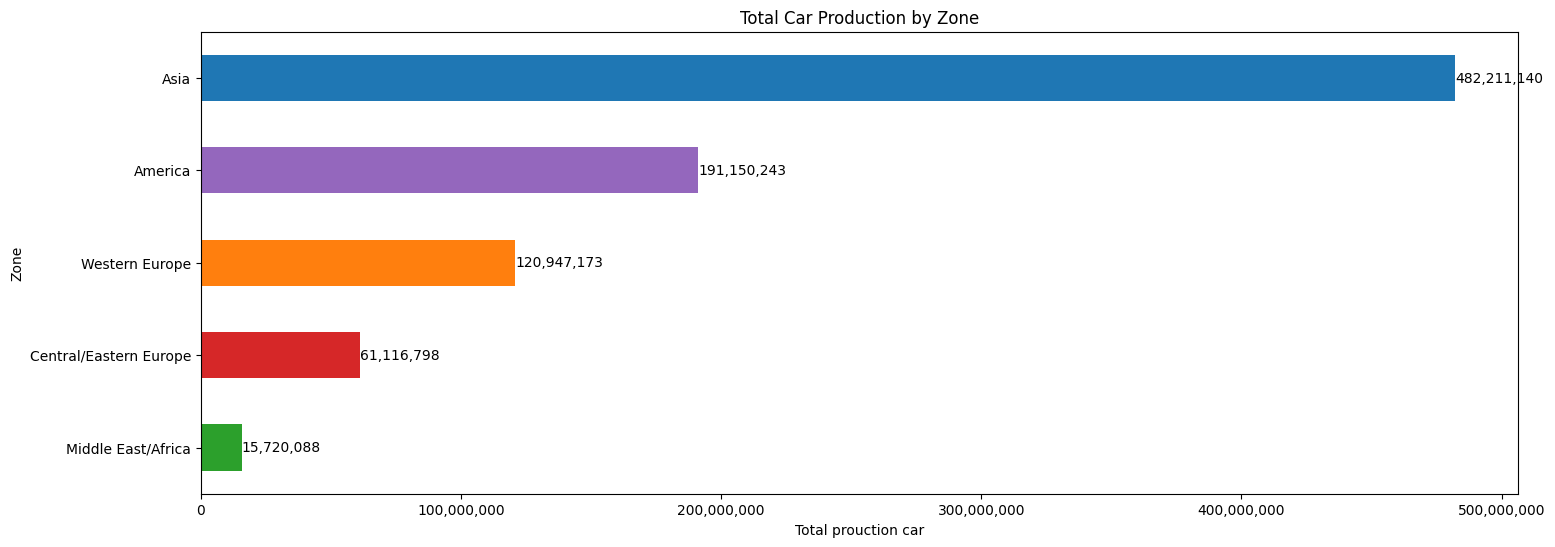

In [392]:
import matplotlib.pyplot as plt
import os
 
regions = df_original["Region"].unique()

total = df_original.groupby("Region")["Total"].sum().sort_values(ascending=True)
 
colors=["tab:green", "tab:red", "tab:orange","tab:purple","tab:blue"] 
ax = total.plot(kind='barh', title='Total Car Production by Zone', figsize=(17, 6),color=colors)
 
plt.xlabel("Total prouction car")
plt.ylabel("Zone")

for container in ax.containers[:]:
    ax.bar_label(container, fmt='{:,.0f}', label_type='edge') 
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))
    
my_path = os.path.abspath("./figure")
my_file = 'figure2_car_production_by_zone.png'
plt.savefig(os.path.join(my_path, my_file))        
 

# Figure 3

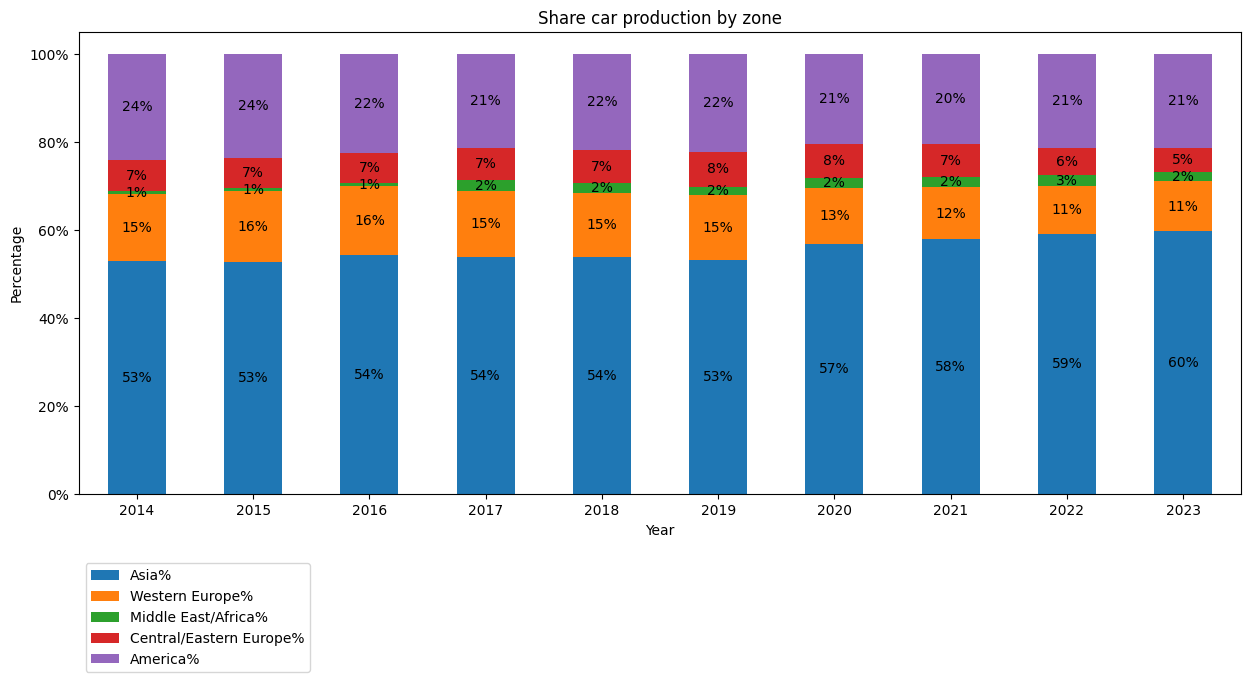

In [396]:
import matplotlib.pyplot as plt
import os
 
import numpy as np

years = [i for i in range(2014,2024)]  
transformed_data = {
    "year": years,
}

regions = df_original["Region"].unique()

new_data = {
    
}
percentage_column_name = []
# Step 2: Iterate over each year and sum data by region
for region in regions:
    transformed_data[str(region)]=[]
    new_data[str(region)+"%"]=[]
    percentage_column_name.append(str(region)+"%")
    for year in years:
        sum_by_year = df_original[ (df_original["Region"] == region)][str(year)].sum()
        transformed_data[str(region)].append(sum_by_year)
        
 
df_transformed = pd.DataFrame(transformed_data)
percentage_column_name.append('year') 
df_transformed['Total'] = df_transformed.iloc[:, 1:].sum(axis=1) 
for i in range(1,len(df_transformed.columns)):
    df_transformed[df_transformed.columns[i]+"%"] = ( df_transformed.iloc[:, i]/df_transformed.iloc[:, 6] ) * 100
colors=["tab:blue","tab:orange","tab:green", "tab:red" ,"tab:purple",] 
selected_df = df_transformed.loc[:, df_transformed.columns.isin(percentage_column_name)]

ax = selected_df.plot(kind='bar',x='year', stacked=True , color=colors, figsize=(15,6))
for container in ax.containers:
    ax.bar_label(container, fmt='{:,.0f}%', label_type='center') 
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}%'))
ax.legend(loc='lower left', bbox_to_anchor=(0, -0.4))

plt.ylabel("Percentage")
plt.xlabel("Year")
plt.xticks(rotation=0)
plt.title("Share car production by zone") 

my_path = os.path.abspath("./figure")
my_file = 'figure3_car_production_by_zone_percentage.png'
plt.savefig(os.path.join(my_path, my_file), bbox_inches='tight')       

# print(selected_df)

# Figure 4

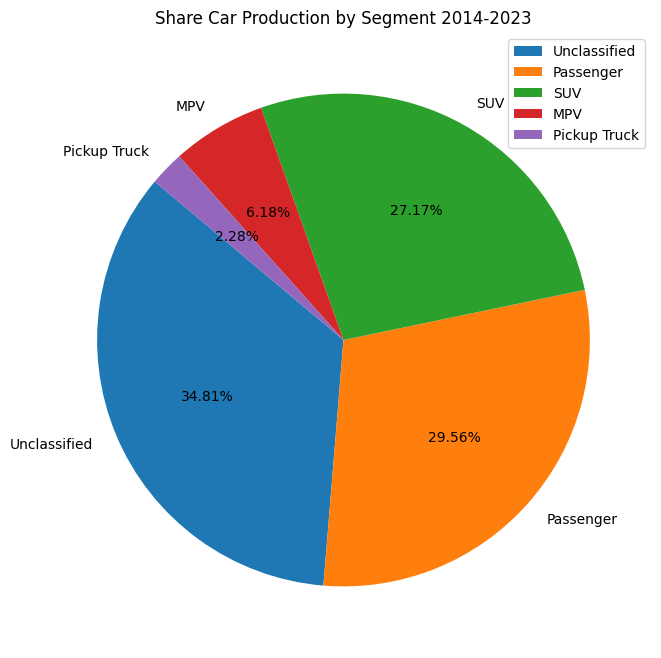

In [276]:
import matplotlib.pyplot as plt

 
data  = df_original["Group_Segment"].value_counts()
labels = data.index.tolist()  
sizes = data.values.tolist() 
 
fig, ax = plt.subplots(figsize=(8, 8))
colors=["tab:blue","tab:orange","tab:green", "tab:red" ,"tab:purple",]
# ax.pie(data["Group_Segment"], labels=labels, autopct='%1.1f%%', startangle=140, colors=['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple'])
ax.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=140, colors=colors)
plt.title("Share Car Production by Segment 2014-2023")
plt.legend(labels, loc="upper right")


my_path = os.path.abspath("./figure")
my_file = 'figure4_share_car_production_by_segment_2014-2023.png'
plt.savefig(os.path.join(my_path, my_file))  

# Back up

In [ ]:
df_original["Region"].unique()

array(['Asia', 'Western Europe', 'Middle East/Africa',
       'Central/Eastern Europe', 'America'], dtype=object)

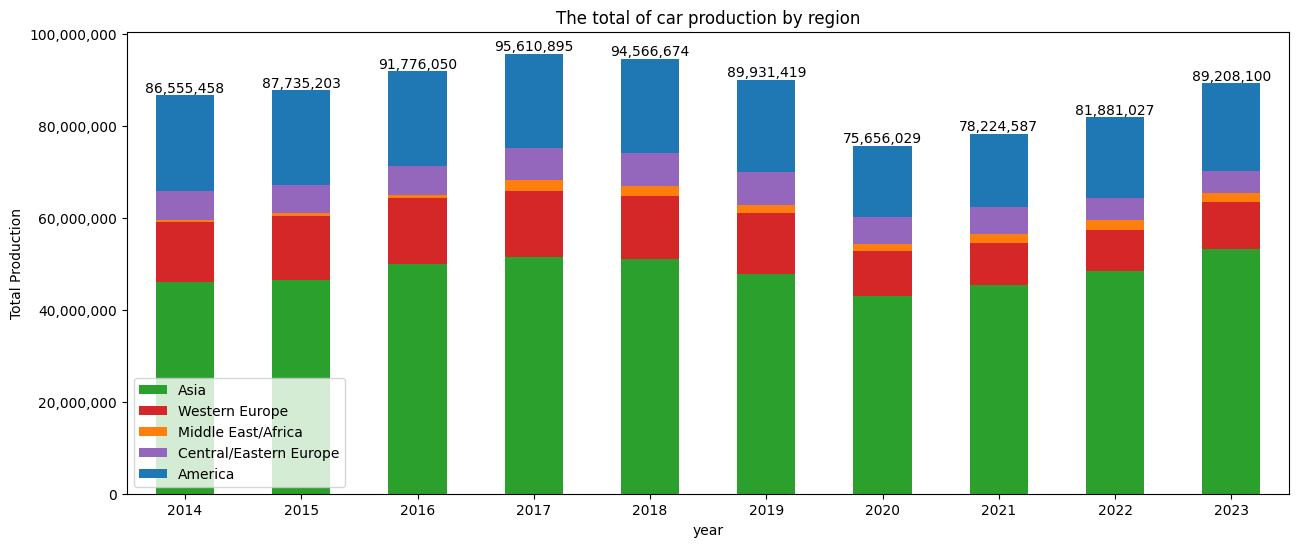

In [398]:
import matplotlib.pyplot as plt
years = [i for i in range(2014,2024)]

# Create an empty dictionary to store the results
transformed_data = {
    "year": years,
}
regions = df_original["Region"].unique()
percentage_column_name = []
 
# Step 2: Iterate over each year and sum data by region
for region in regions:
    transformed_data[str(region)]=[]
    for year in years:
        sum_by_year = df_original[ (df_original["Region"] == region)][str(year)].sum()
        transformed_data[str(region)].append(sum_by_year)
colors=["tab:green", "tab:red", "tab:orange","tab:purple","tab:blue"] 
# transformed_data
df_transformed = pd.DataFrame(transformed_data)
ax = df_transformed.plot.bar(x='year', stacked=True, title='The total of car production by region',figsize=(15, 6), color=colors)
plt.ylabel("Total Production")
plt.xticks(rotation=0)
for container in ax.containers[4:5]:
    ax.bar_label(container, fmt='{:,.0f}', label_type='edge') 
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))


## Figure 5

In [310]:
import matplotlib.pyplot as plt
import os
years = [i for i in range(2014,2024)] 
plt.style.use('tableau-colorblind10')

percentage_column_name= []
# print(df_original)
transformed_data = {
    "year": years,
}
group_segments = df_original["Group_Segment"].unique()

for group_segment in group_segments:
    transformed_data[str(group_segment)]=[]
    percentage_column_name.append(str(group_segment)+"%")
    for year in years:
        sum_by_year = df_original[ (df_original["Group_Segment"] == group_segment)][str(year)].sum()
        transformed_data[str(group_segment)].append(sum_by_year)


df_transformed = pd.DataFrame(transformed_data)
# percentage_column_name.append('year') 
# percentage_column_name.append('Total') 
# print(df_transformed)

df_transformed['Total'] = df_transformed.iloc[:, 1:].sum(axis=1) 



for i in range(1,len(df_transformed.columns)):
    df_transformed[df_transformed.columns[i]+"%"] = ( df_transformed.iloc[:, i]/df_transformed.iloc[:, 6] ) * 100


selected_df = df_transformed.loc[:, df_transformed.columns.isin(percentage_column_name)]
print(selected_df)
colors=["tab:blue","tab:orange","tab:green", "tab:red" ,"tab:purple"] 

ax = selected_df.plot(kind='bar',x='year', stacked=True , color=colors, figsize=(15,6))
for container in ax.containers:
    ax.bar_label(container, fmt='{:,.0f}%', label_type='center') 
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}%'))
ax.legend(loc='lower left', bbox_to_anchor=(0, -0.4))

plt.ylabel("Percentage")
plt.xlabel("Year")
plt.title("Share Car Production by Segment 2014-2023") 

my_path = os.path.abspath("./figure")
my_file = 'figure_5_share_car_production_by_segment_2014-2023.png'
plt.savefig(os.path.join(my_path, my_file), bbox_inches='tight')     

Index(['year', 'Passenger', 'SUV', 'MPV', 'Unclassified', 'Pickup Truck',
       'Total'],
      dtype='object')


# Figure 6

   year  Passenger A%  Passenger B%  Passenger C%  Passenger D%  Passenger E%  \
0  2014      6.695216     11.630987     21.241473      9.769044      2.748781   
1  2015      6.169371     10.615887     20.464215      9.671754      2.396267   
2  2016      5.402346      9.503636     19.784559      8.904760      2.315403   
3  2017      5.772665     10.508166     17.642605      8.470727      2.281435   
4  2018      5.451748     10.334805     15.505328      8.631550      2.294489   
5  2019      5.074291      9.620033     14.258445      8.713314      2.240282   
6  2020      4.569378      8.766457     13.133101      8.944497      2.288382   
7  2021      5.094600      8.151313     11.288552      8.432248      2.503373   
8  2022      5.306665      7.912906     10.278710      9.488732      2.657986   
9  2023      4.550792      7.167023      9.706166      9.670888      2.607461   

     SUV-B%     SUV-C%     SUV-D%    SUV-E%      MPV%  Unclassified%  \
0  1.979331   8.585732   8.037403  2

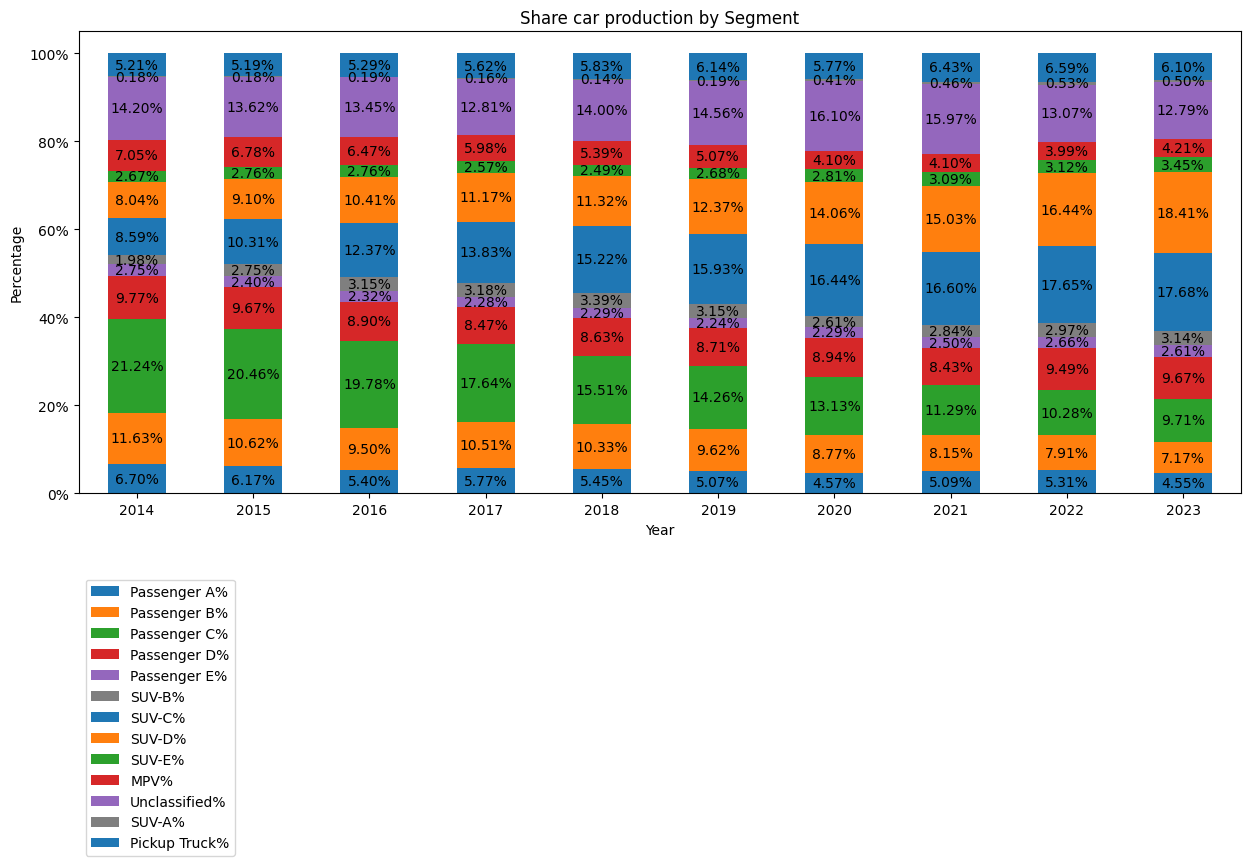

In [394]:
import matplotlib.pyplot as plt
import os
years = [i for i in range(2014,2024)] 
plt.style.use('tableau-colorblind10')

percentage_column_name = []
# print(df_original["Segment"].unique())
transformed_data = {
    "year": years,
}
group_segments = df_original["Segment"].unique()

for group_segment in group_segments:
    transformed_data[str(group_segment)]=[]
    percentage_column_name.append(str(group_segment)+"%")
    for year in years:
        sum_by_year = df_original[ (df_original["Segment"] == group_segment)][str(year)].sum()
        transformed_data[str(group_segment)].append(sum_by_year)


df_transformed = pd.DataFrame(transformed_data)
percentage_column_name.append('year') 
percentage_column_name.append('Total') 


df_transformed['Total'] = df_transformed.iloc[:, 1:].sum(axis=1) 
# print(df_transformed)
# print(df_transformed.columns)
for i in range(1,len(df_transformed.columns)):
    df_transformed[df_transformed.columns[i]+"%"] = ( df_transformed.iloc[:, i]/df_transformed.iloc[:, 14] ) * 100

percentage_column_name.remove('Total')
selected_df = df_transformed.loc[:, df_transformed.columns.isin(percentage_column_name)]
print(selected_df)
colors=["tab:blue","tab:orange","tab:green", "tab:red" ,"tab:purple", "tab:grey"] 

ax = selected_df.plot(kind='bar',x='year', stacked=True , color=colors, figsize=(15,6))
for container in ax.containers:
    ax.bar_label(container, fmt='{:,.2f}%', label_type='center') 
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.2f}'))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}%'))
ax.legend(loc='lower left', bbox_to_anchor=(0, -0.8))

plt.ylabel("Percentage")
plt.xticks(rotation=0)
plt.xlabel("Year")
plt.title("Share car production by Segment") 

my_path = os.path.abspath("./figure")
my_file = 'figure_6_share_car_production_by_segment_2014-2023.png'
plt.savefig(os.path.join(my_path, my_file), bbox_inches='tight')     

# Figure 7

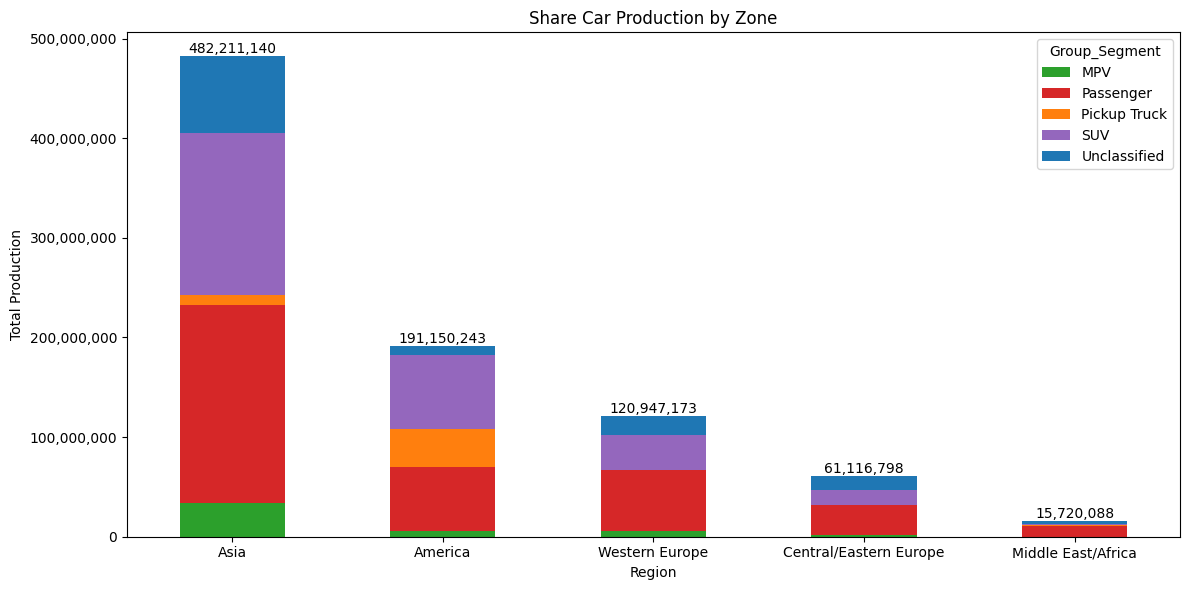

In [393]:
import matplotlib.pyplot as plt
import os
 
 
grouped_data = df_original.groupby(['Region', 'Group_Segment'])['Total'].sum().unstack(fill_value=0)
region_totals = df_original.groupby('Region')['Total'].sum()
 
sorted_regions = region_totals.sort_values(ascending=False).index
 
grouped_data_sorted = grouped_data.loc[sorted_regions]
colors=["tab:green", "tab:red", "tab:orange","tab:purple","tab:blue"]  
ax = grouped_data_sorted.plot(kind='bar', stacked=True, figsize=(12, 6), color=colors)

 

for container in ax.containers[4:5]:
    ax.bar_label(container, fmt='{:,.0f}', label_type='edge') 
 
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.xticks(rotation=0)
plt.title("Share Car Production by Zone") 
plt.ylabel("Total Production") 
plt.tight_layout()
my_path = os.path.abspath("./figure")
my_file = 'figure_7_share_car_production_by_zone.png'
plt.savefig(os.path.join(my_path, my_file), bbox_inches='tight')        
 

In [358]:
df_original

,Country,Maker/Brand,Type,Group_Segment,Segment,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Region,Total
0,Japan,Toyota,Mini Cars,Passenger,Passenger A,23148,18812,21208,22158,25184,24076,17892,17653,15116,10354,Asia,195601
1,Japan,Toyota,Cars,Passenger,Passenger A,0,0,0,0,0,0,0,520,1106,425,Asia,2051
2,Japan,Toyota,Cars,Passenger,Passenger A,0,0,0,0,0,679,1670,1415,2020,1451,Asia,7235
3,Japan,Toyota,Cars,Passenger,Passenger A,2342,801,143,0,0,0,0,0,0,0,Asia,3286
4,Japan,Toyota,Cars,Passenger,Passenger B,286270,265426,197156,146129,137626,110647,71465,77266,68951,78927,Asia,1439863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5269,Argentina,Iveco (2014-21),Buses,Unclassified,Unclassified,1,0,0,0,0,0,0,0,0,0,America,1
5270,Argentina,Iveco (2014-21),Buses,Unclassified,Unclassified,30,0,0,0,0,0,0,0,0,0,America,30
5271,Argentina,Changan/Chana,Light Trucks,Unclassified,Unclassified,0,0,0,0,0,0,0,0,866,421,America,1287
5272,Argentina,n.a.,Trucks,Unclassified,Unclassified,0,0,0,0,0,0,0,0,0,0,America,0
